pKa rules only

support = fraction of the dataset to which rule applies


coefficient = linear coefficient for the rule

In [14]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKA_logP_minmaxscaler\logP\train_logp_minmax.csv', index_col=0)
y = train['logP']
X=train.drop(['logP', 'fold_id'], axis=1)

regr = ElasticNetCV(cv=2, random_state=0, max_iter=20000)
regr.fit(X, y)
test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKA_logP_minmaxscaler\logP\test_logp_minmax.csv', index_col=0)

def metrics(test, feature):
    y_pred = regr.predict(test.drop([feature], axis=1))
    r2 = r2_score(y_pred=y_pred, y_true = test[feature])
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test[feature], y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test[feature], y_pred=y_pred), 3))
metrics(test, 'logP')
regr.score(X, y)
metrics(train.drop('fold_id', axis=1), 'logP')

=========logP=========
R^2 = 0.91
MAE =  0.121
MSE =  0.024
=========logP=========
R^2 = 0.877
MAE =  0.151
MSE =  0.039


In [15]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn import svm

# train = pd.read_csv('train_logP_v2.csv')
y = train['logP']
X=train.drop(['logP', 'fold_id'], axis=1)
regr = svm.SVR(kernel='rbf')
scores = cross_validate(regr, X, y, cv=2, groups=train['fold_id'], scoring='r2', return_train_score=True, return_estimator=True)

#metrics(test, 'logP')
regr = scores['estimator'][1]
metrics(test, 'logP')
metrics(train.drop('fold_id', axis=1), 'logP')

=========logP=========
R^2 = 0.827
MAE =  0.176
MSE =  0.046
=========logP=========
R^2 = 0.838
MAE =  0.161
MSE =  0.051


In [17]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd
from sklearn import svm

# train = pd.read_csv('train_logP_v2.csv')
y = train['logP']
X=train.drop(['logP', 'fold_id'], axis=1)

regr = svm.SVR(kernel ='rbf')
regr.fit(X, y)
# test = pd.read_csv('test_logP_v2.csv')
y_pred = regr.predict(test.drop(['logP'], axis=1))
def metrics(test, feature):
    y_pred = regr.predict(test.drop([feature], axis=1))
    r2 = r2_score(y_pred=y_pred, y_true = test[feature])
    print(f'=========%s========='%(feature))
    print('R^2 = '+str(round(r2, 3)))
    print('MAE = ', round(mae(y_true = test[feature], y_pred=y_pred), 3))
    print('MSE = ', round(mse(y_true = test[feature], y_pred=y_pred), 3))
metrics(test, 'logP')
regr.score(X, y)
metrics(train.drop('fold_id', axis=1), 'logP')

=========logP=========
R^2 = 0.922
MAE =  0.122
MSE =  0.021
=========logP=========
R^2 = 0.931
MAE =  0.11
MSE =  0.022


In [147]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

all = pd.read_csv('pKa_X_y.csv').dropna(axis=1)
y = all['pKa']
y_discretized = KBinsDiscretizer(n_bins=10,
                                 encode='ordinal',
                                 strategy='uniform').fit_transform(y.values.reshape(-1, 1))
train, test = train_test_split(all, stratify=y_discretized)
y = train['pKa']
X=train.drop(['pKa'], axis=1)

regr = ElasticNetCV(cv=2, random_state=0, max_iter=20000)
regr.fit(X, y)
#test = pd.read_csv('test_logP_v2.csv')
print(regr.alpha_)
print(regr.intercept_)
#print(regr.predict([[0, 0]]))
y_pred = regr.predict(test.drop(['pKa'], axis=1))
metrics(test, 'pKa')
regr.score(X, y)
metrics(train, 'pKa')

0.1993597410820284
13.435594599535023
=========pKa=========
R^2 = 0.863
MAE =  0.727
MSE =  0.862
=========pKa=========
R^2 = 0.902
MAE =  0.656
MSE =  0.661


/home/redman/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [49]:
y_pred = regr.predict(X)
r2 = r2_score(y_pred=y_pred, y_true = y)
print(r2)

0.843201801869303


In [ ]:
def cross_val_train(df):
    y = all['pKa']
    y_discretized = KBinsDiscretizer(n_bins=10,
                                 encode='ordinal',
                                 strategy='uniform').fit_transform(y.values.reshape(-1, 1))
    train, test = train_test_split(df, stratify=y_discretized)
    y = train['pKa']
    X=train.drop(['pKa'], axis=1)

    regr = svm.SVR(kernel='rbf')
    regr.fit(X, y)
    y_pred = regr.predict(test.drop(['pKa'], axis=1))
    r2 = r2_score(y_pred=y_pred, y_true = test['pKa'])

In [148]:
from sklearn import svm

all = pd.read_csv('pKa_X_y.csv').dropna(axis=1)
y = all['pKa']
y_discretized = KBinsDiscretizer(n_bins=10,
                                 encode='ordinal',
                                 strategy='uniform').fit_transform(y.values.reshape(-1, 1))
train, test = train_test_split(all, stratify=y_discretized)
y = train['pKa']
X=train.drop(['pKa'], axis=1)

regr = svm.SVR(kernel='rbf')
regr.fit(X, y)
y_pred = regr.predict(test.drop(['pKa'], axis=1))
r2 = r2_score(y_pred=y_pred, y_true = test['pKa'])
print(r2)
metrics(test, 'pKa')
regr.score(X, y)
metrics(train, 'pKa')

0.7982615928853947
=========pKa=========
R^2 = 0.798
MAE =  0.899
MSE =  1.334
=========pKa=========
R^2 = 0.798
MAE =  0.903
MSE =  1.344


/home/redman/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [51]:
y_pred = regr.predict(X)
r2 = r2_score(y_pred=y_pred, y_true = y)
print(r2)

0.8055916511961834


In [66]:
from sklearn import svm

all = pd.read_csv('logP_X_y.csv').dropna(axis=1)
y = all['logP']
print(len(y.values.reshape(-1, 1)))
y_discretized = KBinsDiscretizer(n_bins=102,
                                 encode='ordinal',
                                 strategy='uniform').fit_transform(y.values.reshape(-1, 1))
train, test = train_test_split(all, stratify=y_discretized)
y = train['logP']
X=train.drop(['logP', 'fold_id'], axis=1)

regr = svm.SVR(kernel='rbf')
regr.fit(X, y)
y_pred = regr.predict(test.drop(['logP', 'fold_id'], axis=1))
r2 = r2_score(y_pred=y_pred, y_true = test['logP'])
print(r2)

178


/home/redman/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd

train = pd.read_csv('train_logP_v2.csv')
y = train['logP']
X=train.drop(['logP', 'fold_id'], axis=1)

regr = ElasticNetCV(cv=2, random_state=0, max_iter=10000)
regr.fit(X, y)
test = pd.read_csv('test_logP_v2.csv')
print(regr.alpha_)
print(regr.intercept_)
#print(regr.predict([[0, 0]]))
y_pred = regr.predict(test.drop(['logP'], axis=1))
r2 = r2_score(y_pred=y_pred, y_true = test['logP'])
print(r2)

In [10]:
train = pd.read_csv('train_logP_v2.csv')
train['logP']

0      2.88
1      2.87
2      2.92
3      2.37
4      2.88
       ... 
147    1.36
148    1.83
149    1.64
150    2.08
151    2.04
Name: logP, Length: 152, dtype: float64

In [3]:
import h2o
h2o.init()
df_pKa = h2o.import_file(path = 'pKa_X_y.csv')


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 hours 36 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.72 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
df_pKa[df_pKa['GeomShapeIndex'].isna()]

H2OFrame is empty.

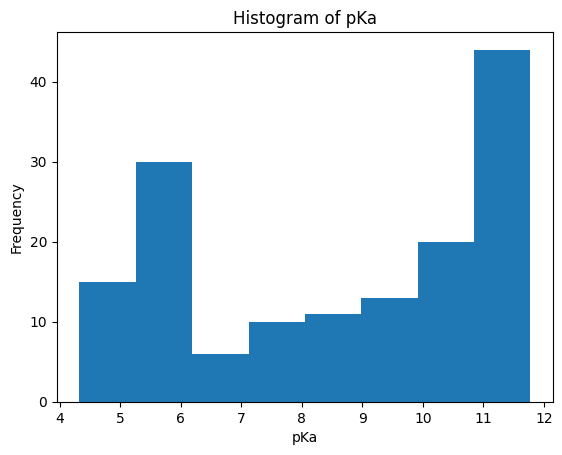

breaks,counts,mids_true,mids,widths
3.86111,nan,nan,nan,nan
4.79222,15,1.465,4.32667,0.931111
5.72333,30,1.935,5.25778,0.931111
6.65444,6,2.415,6.18889,0.931111
7.58556,10,3.03,7.12,0.931111
8.51667,11,3.37,8.05111,0.931111
9.44778,13,3.795,8.98222,0.931111
10.3789,20,4.3,9.91333,0.931111
11.31,44,4.725,10.8444,0.931111


In [4]:
train['pKa'].hist()

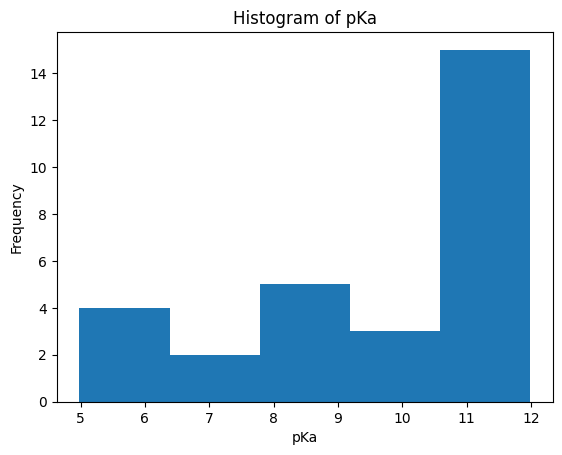

breaks,counts,mids_true,mids,widths
4.28167,nan,nan,nan,nan
5.68333,4,1.44,4.9825,1.40167
7.085,2,2.175,6.38417,1.40167
8.48667,5,2.92,7.78583,1.40167
9.88833,3,3.59,9.1875,1.40167
11.29,15,4.275,10.5892,1.40167


In [5]:
test['pKa'].hist()

In [1]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
# Split the dataset into train and test
train, test = df_pKa.split_frame(ratios=[0.8], seed=1)


x = df_pKa.columns.remove('pKa')
y = 'pKa'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1, model_type='rules')
rfit.train(training_frame=train, x=x, y=y, validation_frame=test)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 days 0 hours 23 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_redman_ebpqtv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.70 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
     variable    coefficient              support              rule
---  ----------  -----------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     M0T45N18    -1.0355010257000752      0.2550335570469799   (PBF < 0.881852924823761 or PBF is NA) & (PNSA5 < -19.829938888549805 or PNSA5 is NA) & (PPSA5 >= 12.348013877868652)
     M0T5N22     0.7085498635042057       0.2550335570469799   (PNSA5 >= -10.43918514251709) & (nN >= 0.5 or nN is NA)
     M0T43N12    0.6786407054589888       0.2684563758389262   (PPSA5 < 12.348013877868652 or PPSA5 is NA) & (dipole_moment < 0.37599650025367737) & (nF < 3.5 or nF is NA)
     M0T33N14   

predict
5.55363
4.7857
4.12224
4.94047
5.50377
5.70143
7.40858
10.2105
10.2105
6.88071


In [2]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 1.4204475680664839
RMSE: 1.1918253093748612
MAE: 0.9893208594763392
RMSLE: 0.1734799562360719
Mean Residual Deviance: 1.4204475680664839
R^2: 0.7821655376310186
Null degrees of freedom: 28
Residual degrees of freedom: -3
Null deviance: 194.38645093106794
Residual deviance: 41.192979473928034
AIC: 158.4766232370652

pKa linear and rules

In [17]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
# Split the dataset into train and test
train, test = df_pKa.split_frame(ratios=[0.8], seed=1)


x = df_pKa.columns.remove('pKa')
y = 'pKa'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1)
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,51 mins 51 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_redman_7t9g24
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.28 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
    variable      coefficient    support    rule
--  ------------  -------------  ---------  ------
    linear.nN     0.884565       1
    linear.PPSA5  -0.505554      1
    linear.PNSA5  0.0554102      1
    linear.C1     0.00408068     1
rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
5.26703
3.59364
4.72521
2.78944
3.70173
4.84899
8.03069
10.1567
10.5375
7.18026


In [18]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.9570402315335573
RMSE: 0.9782843306184339
MAE: 0.8374394158289553
RMSLE: 0.11657423396762931
Mean Residual Deviance: 0.9570402315335573
R^2: 0.8532319326750115
Null degrees of freedom: 28
Residual degrees of freedom: 24
Null deviance: 194.38645093106794
Residual deviance: 27.75416671447316
AIC: 93.02504929928017

LogP rules only

In [15]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_logP = h2o.import_file(path = 'logP_X_y.csv')
# Split the dataset into train and test
train, test = df_logP.split_frame(ratios=[0.8], seed=1)


x = df_logP.columns.remove('logP')
y = 'logP'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1, model_type='rules')
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,51 mins 15 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_redman_7t9g24
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.30 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [nN, naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
     variable    coefficient             support               rule
---  ----------  ----------------------  --------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     M0T4N17     -0.29786428839619405    0.37583892617449666   (GeomShapeIndex < 0.8585526347160339 or GeomShapeIndex is NA) & (TASA < 374.28955078125 or TASA is NA) & (identificator >= 0.5 or identificator is NA)
     M0T9N13     0.2606621050424726      0.6241610738255033    (FPSA3 < 0.03330299258232117 or FPSA3 is NA) & (nO < 2.5 or nO is NA) & (tpsa+f < 82.57411193847656 or tpsa+f is NA)
     M1T47N30    0.13026221096459026     0.21476510067114093   (FPS

predict
2.55934
2.6827
2.36888
1.99768
1.99141
2.16205
2.38234
1.22143
1.71944
2.2608


In [16]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.07662447634735363
RMSE: 0.276811264849091
MAE: 0.2256561668882973
RMSLE: 0.0929071998546102
Mean Residual Deviance: 0.07662447634735363
R^2: 0.6760906321588926
Null degrees of freedom: 28
Residual degrees of freedom: 3
Null deviance: 7.330606470270187
Residual deviance: 2.222109814073255
AIC: 61.80211208313212

LogP rules and linear features

In [13]:
import h2o
h2o.init()
from h2o.estimators import H2ORuleFitEstimator


df_logP = h2o.import_file(path = 'logP_X_y.csv')
# Split the dataset into train and test
train, test = df_logP.split_frame(ratios=[0.8], seed=1)


x = df_logP.columns.remove('logP')
y = 'logP'

rfit = H2ORuleFitEstimator(max_rule_length=10,
                           max_num_rules=1000,
                           seed=1)
rfit.train(training_frame=train, x=x, y=y)

# Retrieve the rule importance:
print(rfit.rule_importance())

# Predict on the test data:
rfit.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,46 mins 59 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_redman_7t9g24
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.32 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
rulefit Model Build progress: |

/home/redman/mambaforge/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [nN, naHRing, nFaHRing, nFaRing]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
Rule Importance: 
    variable               coefficient    support    rule
--  ---------------------  -------------  ---------  --------------------------------------------------------------------------------------------------------------------------------------
    linear.FPSA3           -23.304        1
    linear.nO              -0.834451      1
    linear.GeomShapeIndex  0.568032       1
    linear.identificator   -0.299393      1
    linear.nC              0.0917809      1
    linear.WPSA5           0.0845096      1
    linear.f_to_fg         -0.0317485     1
    M0T43N14               -0.023247      0.348993   (TASA < 349.21856689453125 or TASA is NA) & (nO < 2.5 or nO is NA) & (tpsa+f < 55.65589141845703)
    M0T0N16                0.0136714      0.402685   (FPSA3 < 0.03330299258232117 or FPSA3 is NA) & (GeomShapeIndex >= 0.8354923725128174 or GeomShapeIndex is NA) & (nO < 2.5 or nO is NA)
    linear.nAHRing       

predict
2.74357
2.91318
2.33828
2.11438
1.54597
2.44944
2.22024
1.40766
1.82472
2.67512


In [14]:
perf = rfit.model_performance(test)
perf

ModelMetricsRegressionGLM: rulefit
** Reported on test data. **

MSE: 0.032950075993346185
RMSE: 0.1815215579300326
MAE: 0.13733457337749594
RMSLE: 0.06074483931813512
Mean Residual Deviance: 0.032950075993346185
R^2: 0.8607124146997213
Null degrees of freedom: 28
Residual degrees of freedom: 16
Null deviance: 7.330606470270187
Residual deviance: 0.9555522038070394
AIC: 11.328345286188824

In [4]:
df_pKa = h2o.import_file(path = 'pKa_X_y.csv')
x = df_pKa.columns.remove('pKa')
y = 'pKa'


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
